In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import tensorflow as tf
import seaborn as sns

In [3]:
df_baz = pd.read_excel(r"X_bp.xlsx")
df_baz.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
df_baz.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_ugl = pd.read_excel(r"X_nup.xlsx")
df_ugl.shape
df_ugl.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [53]:
df_ugl.drop(['Unnamed: 0'], axis=1, inplace=True)

In [54]:
df = df_baz.merge(df_ugl, left_index = True, right_index = True, how = 'inner')
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [55]:
#уточним, сколько записей в датасете
df.shape

(1023, 13)

In [8]:
# проверим датасет на дубликаты
df.duplicated().sum()
#дбликатов нет

0

In [9]:
#проверим, есть ли пустые ячейки
df.isnull().mean() * 100
#видим, что пустых значений нет

Соотношение матрица-наполнитель         0.0
Плотность, кг/м3                        0.0
модуль упругости, ГПа                   0.0
Количество отвердителя, м.%             0.0
Содержание эпоксидных групп,%_2         0.0
Температура вспышки, С_2                0.0
Поверхностная плотность, г/м2           0.0
Модуль упругости при растяжении, ГПа    0.0
Прочность при растяжении, МПа           0.0
Потребление смолы, г/м2                 0.0
Unnamed: 0                              0.0
Угол нашивки, град                      0.0
Шаг нашивки                             0.0
Плотность нашивки                       0.0
dtype: float64

In [56]:
#посмотрим информацию о датасете
df.info()
# все переменные содержат значения float64, отсутствуют записи "NaN:, очистка не требуется, файл содержит 1023 строки.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [57]:
#найдем количество уникальных значений
df.nunique()
#видим, что в столбце "Угол нашивки, град", только 2 параметра

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [12]:
#выведем данные значения
df['Угол нашивки, град'].unique()
#видим, что используется только 2 параметра - 90 и 0 градусов

array([ 0, 90], dtype=int64)

In [13]:
#посмотрим в скольких случаях используется угол в 0 граудосов
sum_grad_zero = df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()
sum_grad_zero

520

In [14]:
#посмотрим в скольких случаях используется угол в 90 граудосов
sum_grad_ninety = df['Угол нашивки, град'][df['Угол нашивки, град'] == 90.0].count()
sum_grad_ninety

503

In [15]:
#посчитаем процентное отношения углов нашивки
sum_grad = sum_grad_zero + sum_grad_ninety
sum_grad_zero_percent = sum_grad_zero / sum_grad
print("{:.0%}".format(sum_grad_zero_percent))
# угол в ноль градусов используется в 51% случаях

51%


In [17]:
sum_grad_ninety_percent = sum_grad_ninety / sum_grad
print("{:.0%}".format(sum_grad_ninety_percent))
#угол в 49% используется в 49% случаях

49%


In [1]:
# проихводим обнаружение аномалий, с помощью боксплотов
for column in df.columns:
    fig = px.box(df, y = column)
    fig.show()


NameError: name 'df' is not defined

Соотношение матрица-наполнитель


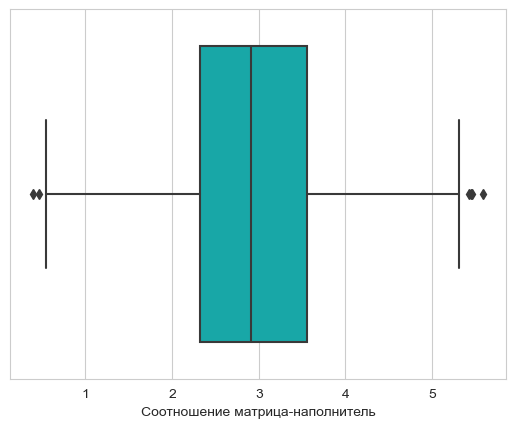

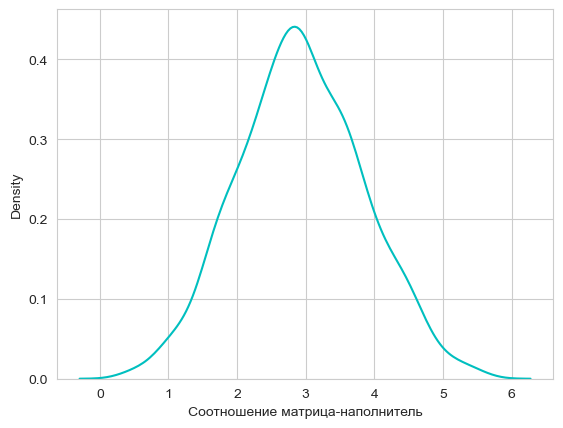

Плотность, кг/м3


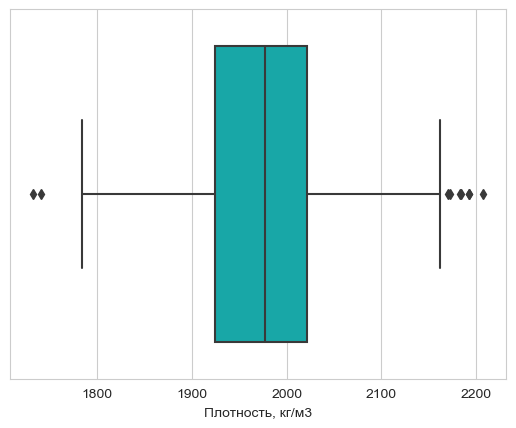

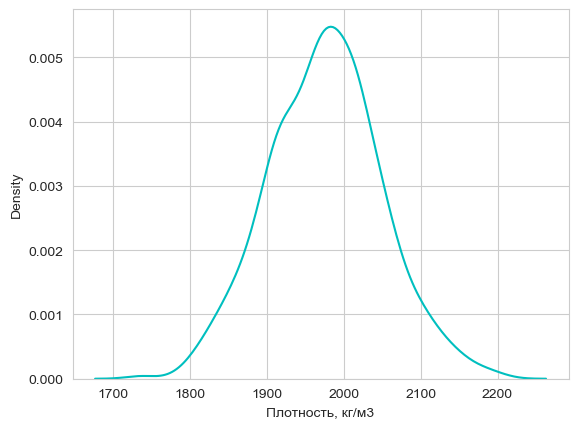

модуль упругости, ГПа


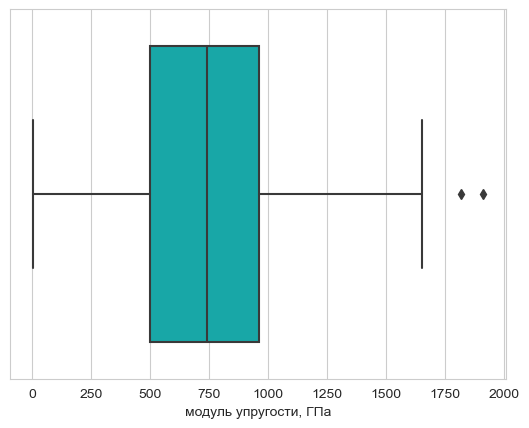

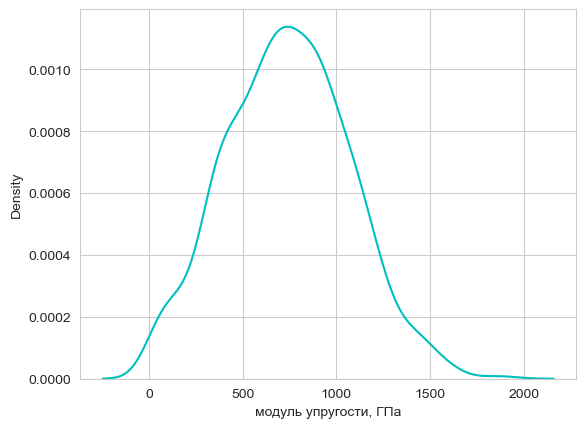

Количество отвердителя, м.%


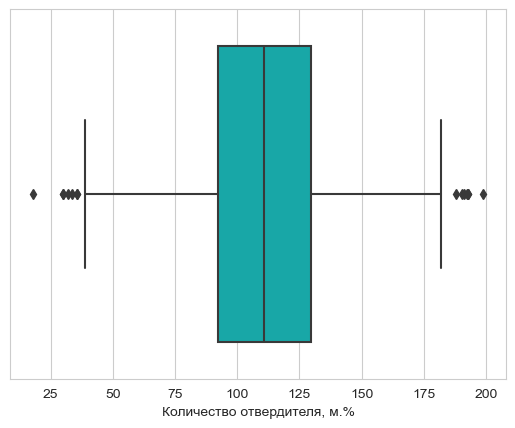

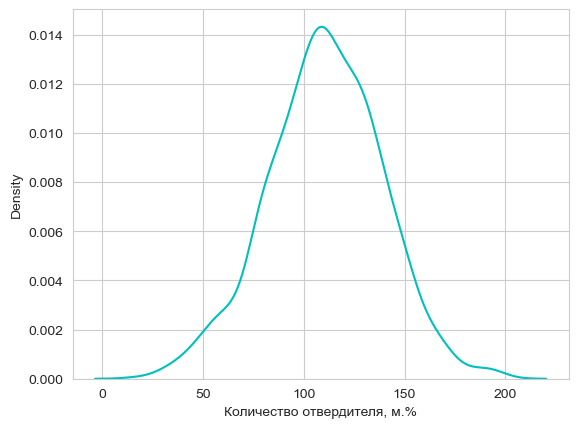

Содержание эпоксидных групп,%_2


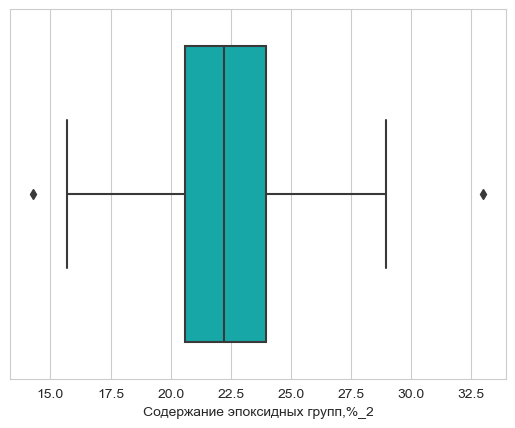

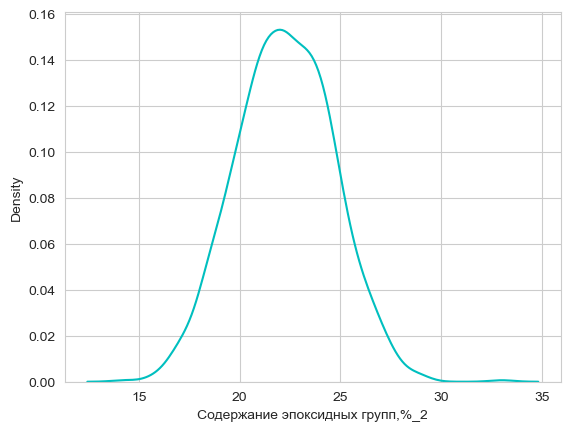

Температура вспышки, С_2


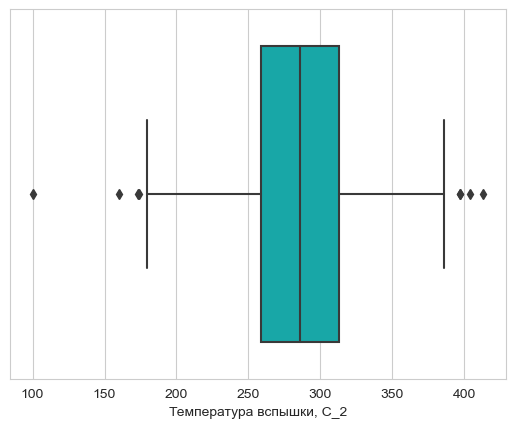

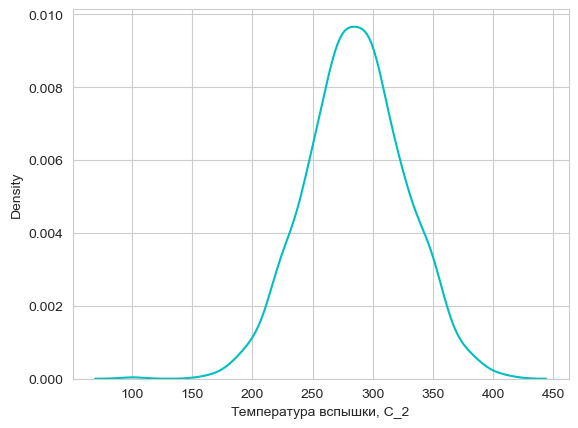

Поверхностная плотность, г/м2


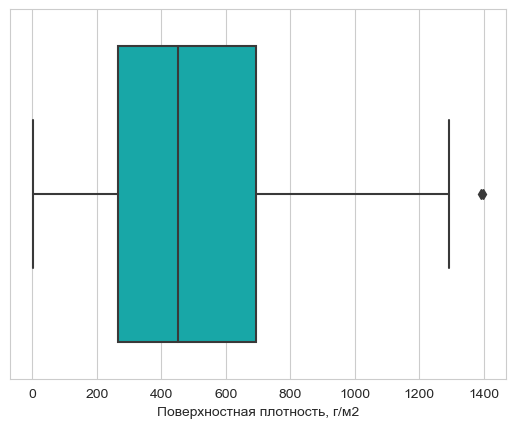

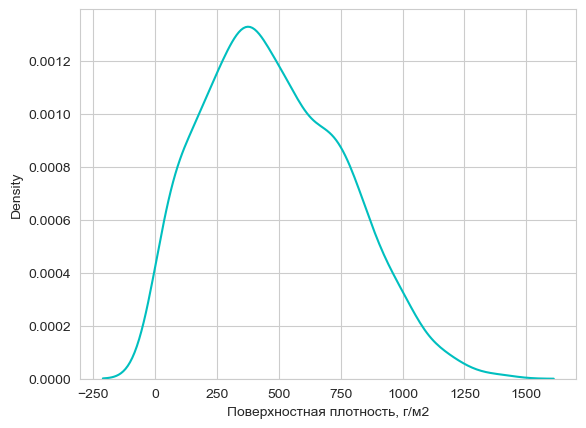

Модуль упругости при растяжении, ГПа


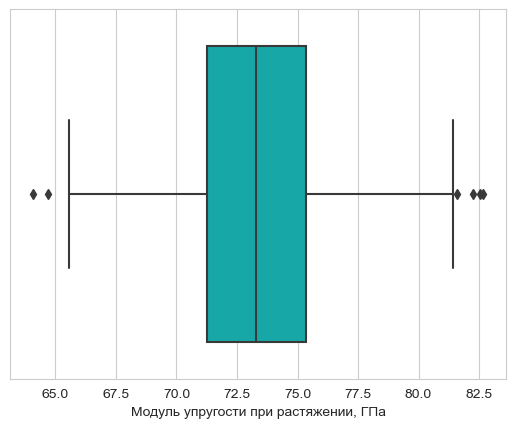

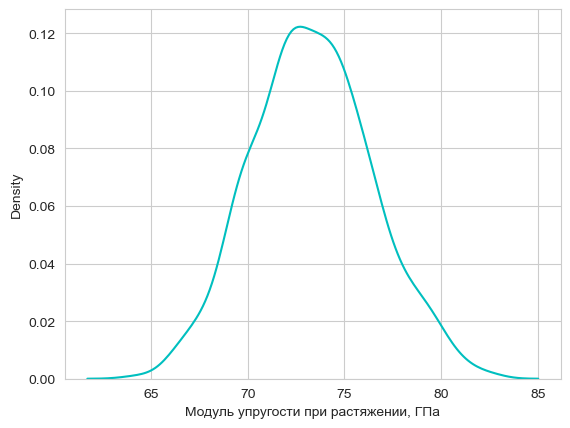

Прочность при растяжении, МПа


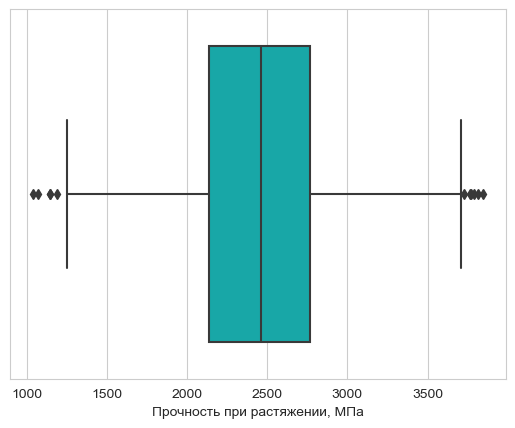

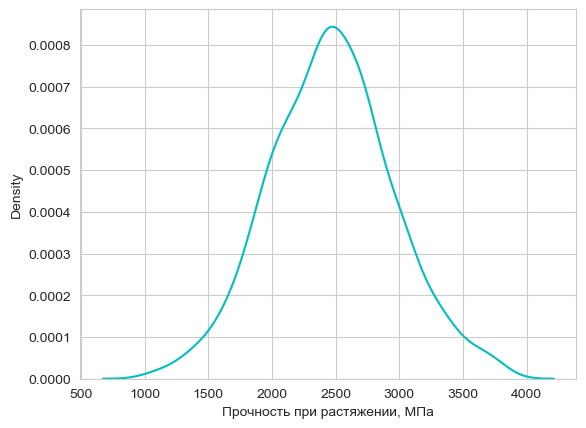

Потребление смолы, г/м2


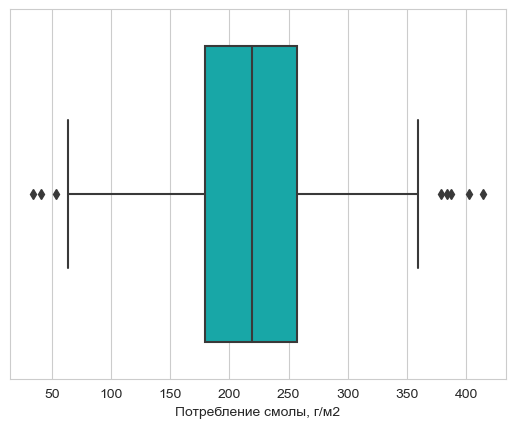

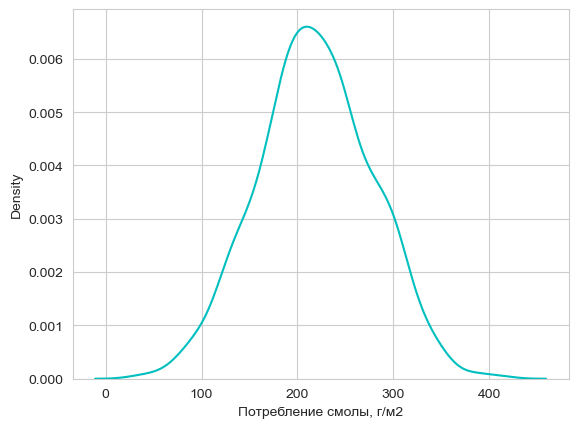

Unnamed: 0


KeyError: 'Unnamed: 0'

In [59]:
# для более подробного рассмотрения выбросов построим гистограмму вместе с боксплотом по каждому столбцу
column_name = df.columns
for column_name in column_names:
  print(column_name)

  #боксплот
  cname = df[column_name]
  sns.boxplot(x=cname, color = "c");
  plt.show()  
    
  #гистограмма
  sns.kdeplot(data = cname, color = "c")
  plt.show()


In [ ]:
#найдем количество выбросов с помощью метода межквартальных диапазонов (IQR)
#
